# Laboratorio 1: Exploración y Visualización de Datos

Integrantes: Lucas Poblete, Benjamin Alcaino


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

## Pongamonos en situación

Eres un **cientifico de datos** que trabaja en **Netflix**.

En los últimos años ha **crecido la cantidad usuarios que ven anime** en la plataforma, por lo que el equipo de contenido de Netflix ha decidido invertir en la producción de series de anime.

Tu jefe te ha pedido que **realices un análisis de los datos de las series de anime** para entender mejor el mercado y poder tomar decisiones informadas.

## Datos

Para realizar esta tarea, te han entregado un dataset con información de animes de la página **MyAnimeList** (MAL).

FUENTE: https://www.kaggle.com/datasets/azathoth42/myanimelist

Tenemos 2 archivos:
- `anime.csv`: Contiene 6 atributos: "title", "type", "source", "episodes", "airing" y "studio", que corresponden a información sobre el anime.
- `anime-stats.csv`: Contiene 4 atributos: "title", "score", "members" (número de usuarios que tienen el anime en su lista) y "favorites", que corresponden a estadísticas sobre la popularidad de cada anime.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Para que la siguiente celda funcione, los archivos CSV deben estar en la misma carpeta que este notebook.

In [3]:
df_anime = pd.read_csv('anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('anime-stats.csv', encoding="UTF-8")

También puedes cargarlos remotamente de un repositorio usando el link a los archivos:


In [4]:
df_anime = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime-stats.csv', encoding="UTF-8")

Cualquiera de estas 2 formas es válida para cargar los datos.

## Exploración básica


Para hacernos una idea de como se ven los datos, lo más usual es mostrar los primeros registros de cada dataset.

1. Muestre los primeros 5 registros de cada dataset.

In [5]:
print(df_anime.head())

                 title type    source  episodes  airing            studio
0        Inu x Boku SS   TV     Manga        12   False  David Production
1     Seto no Hanayome   TV     Manga        26   False             Gonzo
2   Shugo Chara!! Doki   TV     Manga        51   False         Satelight
3        Princess Tutu   TV  Original        38   False    Hal Film Maker
4  Bakuman. 3rd Season   TV     Manga        25   False         J.C.Staff


In [6]:
print(df_stats.head())

                 title  score  members  favorites
0        Inu x Boku SS   7.63   283882       2809
1     Seto no Hanayome   7.89   204003       2579
2   Shugo Chara!! Doki   7.55    70127        802
3        Princess Tutu   8.21    93312       3344
4  Bakuman. 3rd Season   8.67   182765       2082


Siempre es útil conocer **cuántos datos y cuántas columnas** tenemos.

Esto es importante para poder responder
- ¿Tenemos suficientes datos?
- ¿Tenemos suficientes columnas?
- ¿Será muy caro computacionalmente trabajar con estos datos?

2. ¿Cuales son las dimensiones de cada dataset? en otras palabras, ¿cuántas filas y columnas tiene cada uno?

In [7]:
print(df_anime.shape)

(14478, 6)


In [8]:
print(df_stats.shape)

(14478, 4)


3. Además de ver algunos registros y las dimensiones, también es útil conocer algunas **estadísticas básicas** de los datos. Usa una función que nos permita **ver las estadísticas básicas** de **todas las columnas**.

In [9]:
print(df_anime.describe())

           episodes
count  14478.000000
mean      11.308399
std       43.443451
min        0.000000
25%        1.000000
50%        1.000000
75%       12.000000
max     1818.000000


In [10]:
print(df_stats.describe())

              score       members      favorites
count  14478.000000  1.447800e+04   14478.000000
mean       6.142482  2.296640e+04     311.649606
std        1.463981  7.498136e+04    2615.554211
min        0.000000  0.000000e+00       0.000000
25%        5.550000  2.450000e+02       0.000000
50%        6.370000  1.679500e+03       2.000000
75%        7.060000  1.037900e+04      23.000000
max       10.000000  1.456378e+06  106895.000000


## Posibles errores en los datos

Al construir los datasets, es posible que se hayan generado **datos duplicados**, ya sea porque alguien ingresó dos veces la misma información, o porque se generó un error en la recolección de datos. Es importante **detectar y decidir qué hacer con estos datos**.

4.  ¿Existen filas duplicadas en alguno de los dataframes?


In [11]:
Duplicados1 = df_anime.duplicated().sum() #No existen datos duplicados
print(Duplicados1)
print("No existen datos duplicados")

0
No existen datos duplicados


In [12]:
Duplicados2 = df_stats.duplicated().sum() #No existen datos duplicados
print(Duplicados2)
print("No existen datos duplicados")

0
No existen datos duplicados


Otro caso común es que existan **valores nulos** en los datos. Al igual que antes, es importante **identificarlos y decidir qué hacer con ellos**.

5.  ¿Hay filas con valores nulos en los dataframes?

In [13]:
Nulos1 = df_anime.isnull().sum() #Existen 5934 datos nulos en studio
print(Nulos1)
print("Existen 5934 datos nulos en studio")

title          0
type           0
source         0
episodes       0
airing         0
studio      5934
dtype: int64
Existen 5934 datos nulos en studio


In [14]:
Nulos2 = df_stats.isnull().sum() #No existen datos nulos
print(Nulos2)
print("No existen datos nulos")

title        0
score        0
members      0
favorites    0
dtype: int64
No existen datos nulos


Consideremos que estamos en la situación en la que **decidimos eliminar los valores nulos**.

6. En caso de existir valores nulos, elimine las filas que los contengan. ¿Cuántas filas quedan en cada dataset luego de eliminar los valores nulos?

In [15]:
df_eliminar1 = df_anime.dropna() #Antes eran 14478
print(df_eliminar1.shape[0])
print("Antes eran 14478")

8544
Antes eran 14478


In [16]:
df_eliminar2 = df_stats.dropna() #No cambio porque no tiene nulos
print(df_eliminar2.shape[0])
print("No cambió porque no tiene nulos")

14478
No cambió porque no tiene nulos


## Juntemos nuestros datos

Con el objetivo de tener toda la información en un solo dataframe, y así poder responder preguntas más complejas, **unamos ambos dataframes**.

7. Junte ambos dataframes en uno solo **a través de la columna "title"** con un **inner join**, y **muestre los primeros 5 registros** de este nuevo dataframe.

In [17]:
df_Union = pd.merge(df_eliminar1, df_eliminar2, on='title', how='inner')
print(df_Union.head())

                 title type    source  episodes  airing            studio  \
0        Inu x Boku SS   TV     Manga        12   False  David Production   
1     Seto no Hanayome   TV     Manga        26   False             Gonzo   
2   Shugo Chara!! Doki   TV     Manga        51   False         Satelight   
3        Princess Tutu   TV  Original        38   False    Hal Film Maker   
4  Bakuman. 3rd Season   TV     Manga        25   False         J.C.Staff   

   score  members  favorites  
0   7.63   283882       2809  
1   7.89   204003       2579  
2   7.55    70127        802  
3   8.21    93312       3344  
4   8.67   182765       2082  


## Obtengamos información de los datos

Ahora tenemos que entender un poco más sobre los datos que tenemos, para que el equipo de contenido pueda tomar decisiones informadas.

Para esto, tu jefe te ha solicitado las siguientes tareas:

8. "Necesitamos saber cuales son los animes más populares." Para esto, **entrega los 5 animes con más miembros** (número de usuarios que tienen el anime en su lista).

In [18]:
Populares = df_Union.sort_values(by="members", ascending=False).head()
print(Populares)

                                 title type       source  episodes  airing  \
4846                        Death Note   TV        Manga        37   False   
4974                Shingeki no Kyojin   TV        Manga        25   False   
3826                  Sword Art Online   TV  Light novel        25   False   
1602  Fullmetal Alchemist: Brotherhood   TV        Manga        64   False   
5393                     One Punch Man   TV    Web manga        12   False   

            studio  score  members  favorites  
4846      Madhouse   8.67  1456378      88696  
4974    Wit Studio   8.49  1345842      64032  
3826  A-1 Pictures   7.64  1301616      50042  
1602         Bones   9.25  1199091     106895  
5393      Madhouse   8.73  1020754      30747  


9. Esta información puede ser muy valiosa para identificar alguna característica en común de los animes más populares. **Realiza una observación de alguna característica en común, o algo relevante, de los 5 animes** obtenidos en la pregunta anterior.

R: Los 5 animes más populares son tipo TV y 3 corresponden a manga junto a uno que corresponde a web manga por lo que puede ser relevante.

10. Además de un anime popular, el equipo te dice que quiere hacer un anime de mucha calidad, osea, que sea muy bien evaluado, en particular buscan que tenga un score mayor a 9.0. **Entrega los con score mayor a 9.0**.

In [19]:
animeCalidad = df_Union[df_Union["score"]>9.0]
print(animeCalidad)

                                                  title   type        source  \
287                              Hunter x Hunter (2011)     TV         Manga   
666                                      Kimi no Na wa.  Movie      Original   
803                                            Gintama°     TV         Manga   
839                          3-gatsu no Lion 2nd Season     TV         Manga   
1602                   Fullmetal Alchemist: Brotherhood     TV         Manga   
1733                               Clannad: After Story     TV  Visual novel   
1866                                        Steins;Gate     TV  Visual novel   
3519                           Gintama&#039;: Enchousen     TV         Manga   
3755                                      Steins;Gate 0     TV  Visual novel   
3998                                            Gintama     TV         Manga   
4010                                     Koe no Katachi  Movie         Manga   
4043                         Owarimonoga

11. Ahora tu equipo desea analizar a la competencia. Para esto **entrega los 5 estudios de anime con mejor score promedio entre sus animes**.

In [20]:
animeEstudios = df_Union.groupby("studio")["score"].mean().sort_values(ascending=False)
print(animeEstudios.head())

studio
Odolttogi             7.870000
B&amp;T               7.820000
Fuji TV               7.730000
Studio Rikka          7.688571
D &amp; D Pictures    7.635000
Name: score, dtype: float64


12. Después de que te preguntaran por los animes que tienen mejor score, se te ocurre crear una columna que indique cuales animes son "buenos". Para esto, el área de producto te indica que un "mal" anime tiene score bajo 4.0, uno "intermedio" tiene score entre 4.0 y 8.0, y uno "bueno" tiene score sobre 8.0. **Usa el método apply para crear una nueva columna "quality" que tenga como valor "Malo", "Intermedio" o "Bueno" según la definición anterior. Luego, muestra los 5 primeros registros**

In [21]:
def calidad(score):
    if score < 4.0:
        return "Malo"
    elif score < 8.0:
        return "Intermedio"
    else:
        return "Bueno"

df_Union["quality"] = df_Union["score"].apply(calidad)
print(df_Union.head())

                 title type    source  episodes  airing            studio  \
0        Inu x Boku SS   TV     Manga        12   False  David Production   
1     Seto no Hanayome   TV     Manga        26   False             Gonzo   
2   Shugo Chara!! Doki   TV     Manga        51   False         Satelight   
3        Princess Tutu   TV  Original        38   False    Hal Film Maker   
4  Bakuman. 3rd Season   TV     Manga        25   False         J.C.Staff   

   score  members  favorites     quality  
0   7.63   283882       2809  Intermedio  
1   7.89   204003       2579  Intermedio  
2   7.55    70127        802  Intermedio  
3   8.21    93312       3344       Bueno  
4   8.67   182765       2082       Bueno  


13. Rodrigo, un miembro del equipo, te dice: "Si deseamos que la gente nos tenga en sus favoritos, ¿qué tipo de anime deberíamos hacer? Para cada tipo de anime (TV, OVA, Movie, etc) podríamos sumar la cantidad de favoritos, y hacer el tipo de anime que tenga la suma más grande". Sin embargo, tú te percatas de que **hay un problema con lo que él propone**. ¿Cuál es este problema?

R: El problema es que puede ganar el tipo con mas animes, y los animes de este tipo pueden no tener mas favortos que otros animes de otros tipos.

14. Para mostrarle a Rodrigo el problema con la solución que él propuso, **entrega la cantidad de animes por cada tipo**.

In [22]:
df_Union["type"].value_counts()

type
TV         3508
OVA        1753
Special    1339
Movie      1293
ONA         505
Music       136
Unknown      11
Name: count, dtype: int64

15. Tu jefe te dice que tuvo una visión en un sueño, te dice que sabe como hacer el anime más famoso. Quiere hacer un anime de tipo OVA, donde la fuente (columna source) sea Novel. **Entrega las columnas title, members, favorites, y quality de todos los animes que cumplan con estas características**.

In [23]:
df_Union[(df_Union["type"] == "OVA") & (df_Union["source"] == "Novel")][["title", "members", "favorites", "quality"]]

,title,members,favorites,quality
418,Mobile Suit Gundam Unicorn,52688,1066,Bueno
605,H. P. Lovecraft&#039;s The Dunwich Horror and ...,2099,4,Intermedio
894,Ginga Eiyuu Densetsu Gaiden (1999),10381,15,Bueno
1599,X Densha de Ikou,1549,8,Intermedio
1905,The Hakkenden,4982,10,Intermedio
2568,Kubikiri Cycle: Aoiro Savant to Zaregototsukai,44763,290,Intermedio
3225,Another: The Other - Inga,110815,113,Intermedio
3324,Takarajima Memorial: Yuunagi to Yobareta Otoko,749,0,Intermedio
3339,Big Wars: Kami Utsu Akaki Kouya ni,1810,5,Intermedio
3388,Lodoss-tou Senki,36070,366,Intermedio


16. Para verificar si tu jefe tiene sueños extraños, o si realmente tiene una visión, **calcula y muestra el promedio de los miembros, el promedio de los favoritos, y la categoría de quality más repetida** de los animes obtenidos en la pregunta anterior.

In [24]:
print(df_Union['members'].mean())
print(df_Union['favorites'].mean())
print(df_Union['quality'].value_counts().idxmax())

37978.081217086015
525.0609713282621
Intermedio


# Visualicemos los datos

17. Muestre el histograma de todas las puntuaciones de animes

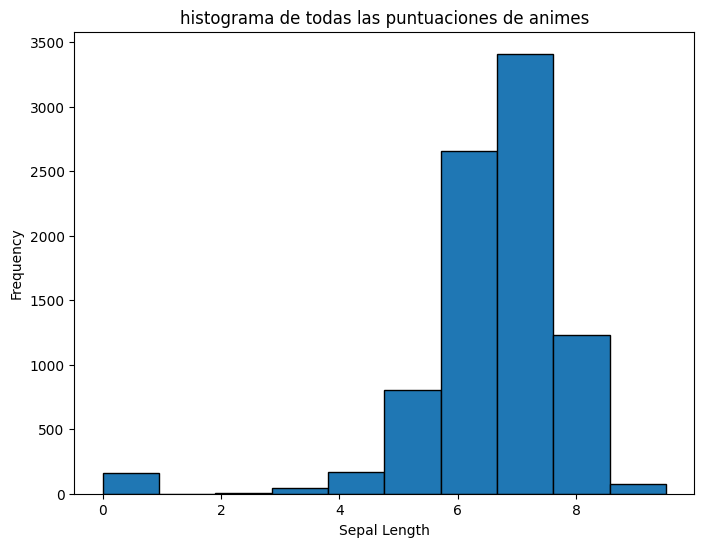

In [25]:
score = df_Union['score']

plt.figure(figsize=(8, 6))
plt.hist(score, edgecolor='black', )

# Título y legendas
plt.title('histograma de todas las puntuaciones de animes')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')


plt.show()

18. Muestre la densidad de puntajes para los principales tipos de anime (TV, OVA, Movie)

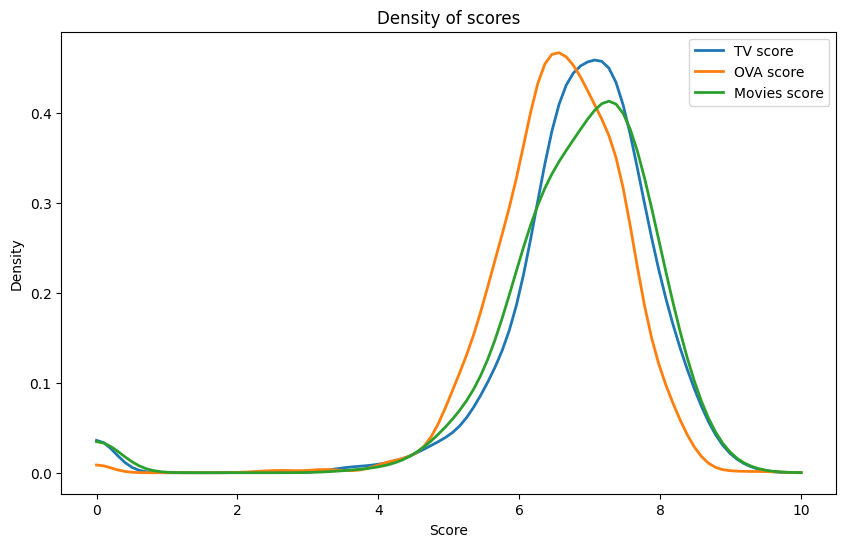

In [29]:
from scipy import stats
import numpy as np

score_TV = df_Union[(df_Union["type"] == "TV")]['score']
score_OVA = df_Union[(df_Union["type"] == "OVA")]['score']
score_Movies = df_Union[(df_Union["type"] == "Movie")]['score']

# Calcula la densidad de la función
density_TV = stats.gaussian_kde(score_TV)
density_OVA = stats.gaussian_kde(score_OVA)
density_Movies = stats.gaussian_kde(score_Movies)
# Genera un rango de valores para los cuales queremos estimar la densidad.
xs = np.linspace(0, 10, 100)
# Calcula la densidad para cada valor en xs.
density_values_TV = density_TV(xs)
density_values_OVA = density_OVA(xs)
density_values_Movies = density_Movies(xs)
# Crea la figura
plt.figure(figsize=(10, 6))
plt.plot(xs, density_values_TV, linewidth=2, label = "TV score")
plt.plot(xs, density_values_OVA, linewidth=2, label = "OVA score")
plt.plot(xs, density_values_Movies, linewidth=2, label = "Movies score")
# Título y legendas
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Density of scores')
plt.legend()

plt.show()

19. ¿Cuál tipo de anime es más exitoso? ¿Se está tomando en cuenta la cantidad de animes por tipo al afirmar eso?

R: El anime de tipo TV, pues tiene mas animes en scores altos que los otros dos tipos, si se toma en cuenta la cantidad de animes por tipo, pues la densidad es la cantidad de animes con un mismo score en cada tipo.

Y eso es todo por hoy :)


![](https://i.imgur.com/ghKLs78.jpeg)